# Introduction

From [Face Detection using OpenCV](https://www.kaggle.com/serkanpeldek/face-detection-with-opencv) by @serkanpeldek we got and slightly modified the functions to extract the cat face.   

In [Detect Cat Face](https://www.kaggle.com/gpreda/detect-cat-face) we used the functions to check one image only.  

We will check now the Cat Face Detection functions against more images from a [Cat Dataset](https://www.kaggle.com/crawford/cat-dataset) (included here).


# Data preparation

## Load packages  

We start by loading the packages.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 
import cv2 as cv

## Load Haar Cascade resource

Here we load the Haar Cascade resource for Cat Face detection.

In [2]:
FACE_DETECTION_FOLDER = "..//input//cat-face-detection//"
#Frontal cat face detector
frontal_cascade_path = os.path.join(FACE_DETECTION_FOLDER,'haarcascade_frontalcatface.xml')

# Cat Face Detection

The class CatFaceDetector initialize the cascade classifier (using the imported resource for cat face detection). The function detect uses a method of the CascadeClassifier to detect objects into images - in this case the cat face.

In [3]:
class CatFaceDetector():
    '''
    Class for Cat Face Detection
    '''
    def __init__(self,object_cascade_path):
        '''
        param: object_cascade_path - path for the *.xml defining the parameters for cat face detection algorithm
        source of the haarcascade resource is: https://github.com/opencv/opencv/tree/master/data/haarcascades
        '''

        self.objectCascade=cv.CascadeClassifier(object_cascade_path)


    def detect(self, image, scale_factor=1.15,
               min_neighbors=1,
               min_size=(30,30)):
        '''
        Function return rectangle coordinates of cat face for given image
        param: image - image to process
        param: scale_factor - scale factor used for cat face detection
        param: min_neighbors - minimum number of parameters considered during cat face detection
        param: min_size - minimum size of bounding box for object detected
        '''
        bbox=self.objectCascade.detectMultiScale(image,
                                                scaleFactor=scale_factor,
                                                minNeighbors=min_neighbors,
                                                minSize=min_size)
        return bbox

We initialize an object of type CatFaceDetector.

In [4]:
#Detector for cat frontal face detectiob created
fcfd=CatFaceDetector(frontal_cascade_path)

We define a function for cat face detection. The detected cat face is marked with an orange circle.

In [5]:
def detect_cat_face(image, scale_factor, min_neighbors, min_size):
    '''
    Cat Face detection function
    Identify frontal cat face and display the detected marker over the image
    param: image - the image extracted from the video
    param: scale_factor - scale factor parameter for `detect` function of ObjectDetector object
    param: min_neighbors - min neighbors parameter for `detect` function of ObjectDetector object
    param: min_size - minimum size parameter for f`detect` function of ObjectDetector object
    '''
    
    image_gray=cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    cat_face=fcfd.detect(image_gray,
                   scale_factor=scale_factor,
                   min_neighbors=min_neighbors,
                   min_size=min_size)

    for x, y, w, h in cat_face:
        #detected cat face shown in color image
        cv.circle(image,(int(x+w/2),int(y+h/2)),(int((w + h)/4)),(0, 127,255),3)

    # image
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    ax.imshow(image)
    #return image

We read a series of 25 cat images and we test the algorithm against this collection of images.

In [6]:
os.listdir("..//input//cat-dataset//CAT_00")

file_list = []
for root, dirs, files in os.walk("..//input//cat-dataset//CAT_00"):
    for file in files:
        if file.endswith(".jpg"):    
            file_list.append(file)

In [7]:
excerpt_file_list = file_list[0:10]
excerpt_file_list

['00000365_028.jpg',
 '00000355_013.jpg',
 '00000398_003.jpg',
 '00000320_021.jpg',
 '00000350_026.jpg',
 '00000437_000.jpg',
 '00000059_000.jpg',
 '00000320_011.jpg',
 '00000040_023.jpg',
 '00000387_011.jpg']

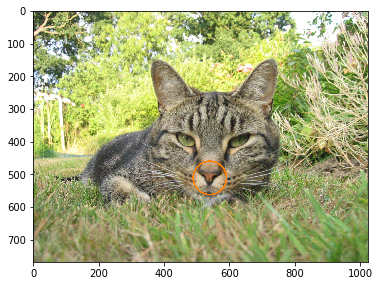

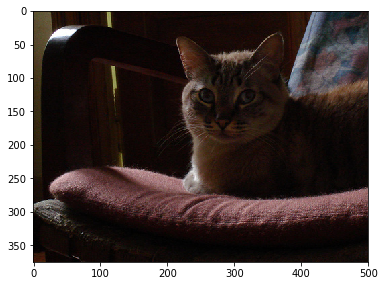

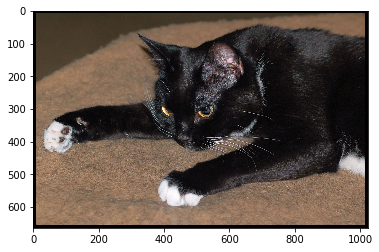

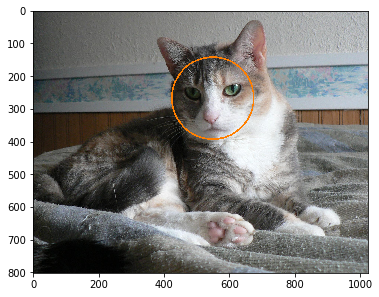

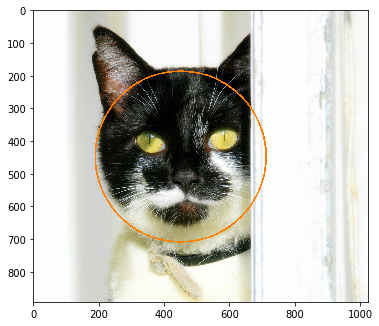

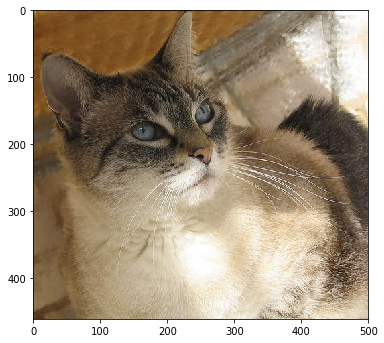

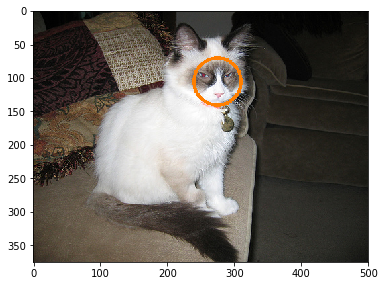

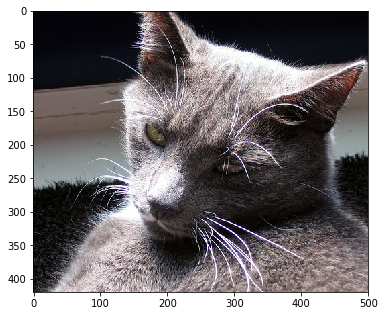

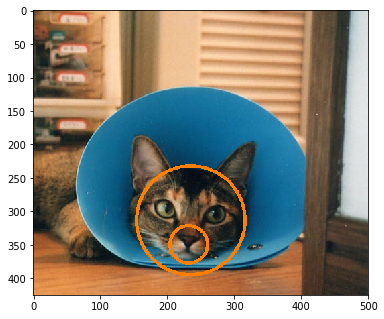

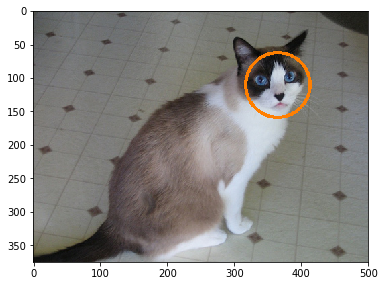

In [8]:
# cat image
for img_src in excerpt_file_list:
    img_source = cv.imread(os.path.join("..//input//cat-dataset//CAT_00",img_src))
    # detect face and show cat face marker over image
    detect_cat_face(image=img_source,scale_factor=1.10, min_neighbors=3, min_size=(50, 50)) 

# More inspiration

Use these resources to start tagging your favorite cat pictures.   

Have fun!